In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
K.set_image_dim_ordering('th')
import numpy as np

Using TensorFlow backend.


In [17]:
# Load data
with open("../data/t.csv") as f:
    lines = [line for line in f]
lines = [np.array(line.split(","), dtype='float32') for line in lines]

In [18]:
lines[0].shape

(785,)

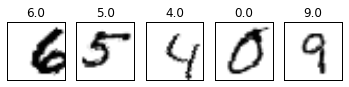

In [19]:
## See first n random digit with their labels
n = 5
fig = plt.figure()
for i in xrange(n):
    plt.subplot(1, n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(lines[i][0])  ## Label
    plt.imshow(lines[i][1:].reshape((28, 28)), cmap=plt.cm.Greys)

In [2]:
# Load data
with open("../data/train.csv") as f:
    lines = [line for line in f]
lines = [np.array(line.split(","), dtype='float32') for line in lines[1:]]

In [3]:
training_images = []
training_labels = []
for line in lines:
    one_hot = np.zeros((10), dtype='float32')
    one_hot[int(line[0])] = 1.0
    training_labels.append(one_hot)
    training_images.append(line[1:])
training_images = np.array(training_images)
training_labels = np.array(training_labels)
training_set = [training_images, training_labels]
training_images_origin = training_images[:]

In [4]:
## Reshape
training_images = training_images.reshape(training_images.shape[0], 1, 28, 28)

In [5]:
# Convert from int to float
training_images = training_images.astype('float32')

In [6]:
# Define data preparation
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=30.,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.05,
                            zoom_range=0.2,
                            channel_shift_range=0.05,
                            fill_mode='nearest',
                            cval=0.,
                            horizontal_flip=False,
                            vertical_flip=False,
                            rescale=None,
                            dim_ordering=K.image_dim_ordering())

In [7]:
# Fit parameters from data
datagen.fit(training_images)

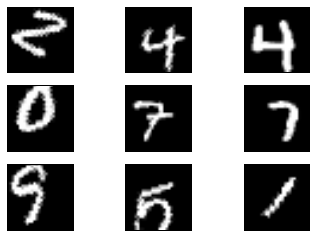

In [8]:
# Configure batch size and retrieve one batch of images
for training_images, training_labels in datagen.flow(training_images, training_labels, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(training_images[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.show()
    break

In [9]:
# Configure batch size and retrieve one batch of images
for training_images, training_labels in datagen.flow(training_images, training_labels, batch_size=9, shuffle=False):
    for i in range(1):
        print training_images[i]
    break

[[[  3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02
     3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02
     3.95422988e-02   1.00366964e+01   1.10366964e+01   1.83036682e+02
     1.83036682e+02   5.20366974e+01   3.95422988e-02   3.95422988e-02
     3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02
     3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02
     3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02]
  [  3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02
     3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02
     3.95422988e-02   3.95422988e-02   1.72036682e+02   2.54036682e+02
     2.53036682e+02   2.53036682e+02   5.10366974e+01   3.95422988e-02
     3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02
     3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02
     3.95422988e-02   3.95422988e-02   3.95422988e-02   3.95422988e-02]
  [ 

In [ ]:
training_images[2]

In [ ]:
## Original
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images_origin[i].reshape(28, 28), cmap=plt.cm.gray)